In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# setting parameters for graphing format
plt.rc('figure', figsize=(7,4))
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [100]:
#data cleaning: passsing in dataset containg average food group intakes in kcal and dropping rows with null values
#df_new to still have copy of non-manipulated datafrane
df_kcal = pd.read_csv('Food_Supply_kcal_Data.csv', na_values = ['nan']).dropna()
df_new =  pd.read_csv('Food_Supply_kcal_Data.csv', na_values = ['nan']).dropna()
df_kg = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')

In [101]:
#See first 5 of df_kcal
df_kcal.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,4.2741,0.3525,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
5,Argentina,1.4354,14.9869,1.0650,0.0,16.7927,0.8643,0.2006,1.4663,9.4459,...,5.5410,0.8643,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0,%


In [102]:
df_kcal.shape

(154, 32)

#### Updating Covid Rates of Dataset Using "worldwide covid data.csv"

In [103]:
#Reading in Updated data for confirmed, death, recovered, and active percentages
ud = pd.read_csv('worldwide covid data.csv',  na_values = ['nan']).dropna()
ud['Confirmed%'] = (ud['Total Cases']/ud['Population']) * 100
ud['Death%'] = (ud['Total Deaths']/ud['Population']) * 100
ud['Recovered%'] = (ud['Total Recovered']/ud['Population']) * 100
ud['Active%'] = (ud['Active Cases']/ud['Population']) * 100
#To find null values
for i in ud.columns:
    print(ud[i].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'CAR' 'Caribbean Netherlands' 'Cayman Islands' 'Chad' 'Channel Islands'
 'Chile' 'China' 'Colombia' 'Congo' 'Costa Rica' 'Croatia' 'Cuba'
 'Curaçao' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'DRC' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faeroe Islands' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Grenada'
 'Guadeloupe' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'

In [104]:
#Editing names of df_kcal to match the updated dataframe names
df_kcal.loc[df_kcal.Country == 'Central African Republic', 'Country'] = 'CAR'
df_kcal.loc[df_kcal.Country == 'Iran (Islamic Republic of)', 'Country'] = 'Iran'
df_kcal.loc[df_kcal.Country == "Lao People's Democratic Republic'", 'Country'] = 'Laos'
df_kcal.loc[df_kcal.Country == 'Republic of Moldova', 'Country'] = 'Moldova'
df_kcal.loc[df_kcal.Country == 'Russian Federation', 'Country'] = 'Russia' 
df_kcal.loc[df_kcal.Country == 'Saint Vincent and the Grenadines', 'Country'] = 'St. Vincent Grenadines'
df_kcal.loc[df_kcal.Country == 'Taiwan*', 'Country'] = 'Taiwan'
df_kcal.loc[df_kcal.Country == 'United Arab Emirates', 'Country'] = 'UAE'
df_kcal.loc[df_kcal.Country == 'United Kingdom', 'Country'] = 'UK'
df_kcal.loc[df_kcal.Country == 'United Republic of Tanzania', 'Country'] = 'Tanzania'
df_kcal.loc[df_kcal.Country == 'United States of America', 'Country'] = 'USA'
df_kcal.loc[df_kcal.Country == 'Venezuela (Bolivarian Republic of)', 'Country'] = 'Venezuela'

In [105]:
#writing function that updates value of confirmed, death, recovered, and active percentages along with population of main dataframe if updated dataframe contains the respective country
ud_c = ud.Country.tolist()
def contains(value):
    if value in ud_c:
        #ensuring the code is no longer changing number of entries in recovered and Active
#         print(df_kcal.describe().at["count", "Recovered"], ":", value)
        df_kcal.loc[df_kcal.Country == value, ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population']] = [ud.loc[ud.Country == value, ['Confirmed%']], ud.loc[ud.Country == value, ['Death%']], ud.loc[ud.Country == value, ['Recovered%']], ud.loc[ud.Country == value, ['Active%']], ud.loc[ud.Country == value, ['Population']]]
#The function above is being applied to every country in the main dataframe
df_kcal.Country.apply(contains)
#checking to see if main dataframe has been updated as expected
df_kcal

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,2.3012,0.7504,4.5,29.8,0.391117,0.018196,0.349546,0.023375,40145225.0,%
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,2.8244,2.7508,22.3,6.2,6.842392,0.106110,6.458112,0.278170,2873425.0,%
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,5.7638,2.0457,26.6,3.9,0.465200,0.013406,0.319045,0.132750,44950745.0,%
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,4.2741,0.3525,6.8,25,0.189690,0.005046,0.184119,0.000525,34283759.0,%
5,Argentina,1.4354,14.9869,1.0650,0.0,16.7927,0.8643,0.2006,1.4663,9.4459,...,5.5410,0.8643,28.5,4.6,11.613979,0.254263,11.323043,0.036673,45772333.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela,0.8454,7.2303,0.6007,0.0,21.3126,0.2892,0.4449,2.3804,3.1368,...,7.5417,0.6674,25.2,21.2,1.504083,0.017964,1.456159,0.029961,28323827.0,%
166,Vietnam,0.7150,10.9806,0.9363,0.0,26.9833,0.2894,1.0385,1.8046,7.8311,...,1.3279,1.9578,2.1,9.3,1.121021,0.024302,0.923611,0.173107,98556168.0,%
167,Yemen,0.0000,3.4667,0.3394,0.0,32.0727,0.1455,0.1697,1.1879,2.0121,...,3.9515,0.3636,14.1,38.9,0.032426,0.006318,0.022061,0.004047,30737797.0,%
168,Zambia,1.1925,3.3043,0.3230,0.0,31.5528,0.1988,0.5714,0.2236,1.5155,...,3.0062,0.4472,6.5,46.7,1.099969,0.019201,1.080297,0.000471,19098078.0,%


In [106]:
df_kcal.describe()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,1.540000e+02
mean,1.310975,9.050435,1.265275,0.003076,20.575647,0.421891,0.592167,2.008186,3.684662,2.938984,...,0.266022,40.950944,4.875444,1.066180,18.449351,5.510239,0.092164,4.968231,0.449843,4.873200e+07
std,1.080327,4.793536,1.316687,0.032440,6.506307,0.310935,0.550383,1.455394,2.116294,2.066412,...,0.293467,4.793145,2.184836,0.641302,9.519483,5.386185,0.097782,4.961672,0.737322,1.660749e+08
min,0.000000,1.623700,0.040800,0.000000,8.956500,0.018800,0.000000,0.147100,0.298000,0.116900,...,0.000000,27.708900,0.932500,0.095700,2.100000,0.000312,0.000000,0.000306,0.000000,7.223500e+04
25%,0.361300,4.810425,0.336850,0.000000,15.338125,0.130675,0.231125,1.184600,1.918425,1.069250,...,0.043175,36.931350,3.075900,0.589400,8.250000,0.465540,0.010222,0.406148,0.006212,3.386338e+06
50%,1.194250,8.730650,0.763300,0.000000,20.060950,0.393550,0.442200,1.679950,3.482050,2.675300,...,0.176050,41.273700,4.638450,0.989000,21.300000,4.204724,0.056853,3.716227,0.088721,1.034807e+07
75%,2.027450,13.073450,1.869675,0.000000,24.970375,0.629950,0.834400,2.383025,5.042525,4.376425,...,0.396200,45.201875,6.519100,1.334775,25.700000,9.427713,0.146331,8.445140,0.498469,3.424861e+07
max,5.157400,22.291100,7.800700,0.400700,37.526500,1.446100,4.418300,8.854000,10.567400,9.944100,...,1.421000,48.386400,10.383900,3.226900,45.500000,24.676325,0.400064,23.787404,3.337548,1.439324e+09


In [107]:
#Confirming modifications by comparing to original main dataframe
df_new.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,4.2741,0.3525,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
5,Argentina,1.4354,14.9869,1.0650,0.0,16.7927,0.8643,0.2006,1.4663,9.4459,...,5.5410,0.8643,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0,%


#### Visualizing Impact of Various Columns on Recovery% to Death% Ratio

In [14]:
#Assigning levels for meat consumption based on quantiles
quant_meat = df_kcal['Meat'].quantile(3/4)
criteria = [df_kcal['Meat'] < quant_meat, df_kcal['Meat'] >= quant_meat]
values = [0, 1]
df_kcal['Meat_Consumption'] = np.select(criteria, values, 0)

In [16]:
#Assigning levels for obesity rates based on quantiles
quant_obesity = df_kcal['Obesity'].quantile(3/4)
criteria = [df_kcal['Obesity'] < quant_obesity, df_kcal['Obesity'] >= quant_obesity]
values = [0, 1]
df_kcal['Obesity_Level'] = np.select(criteria, values, 0)

In [17]:
#Assigning levels for vegetable consumption based on quantiles
quantile1 = df_kcal['Vegetables'].quantile(1/2)
criteria = [df_kcal['Vegetables'] < quantile1, df_kcal['Vegetables'] >= quantile1]
values = [0, 1]
df_kcal['Vegetable_Consumption'] = np.select(criteria, values, 0)

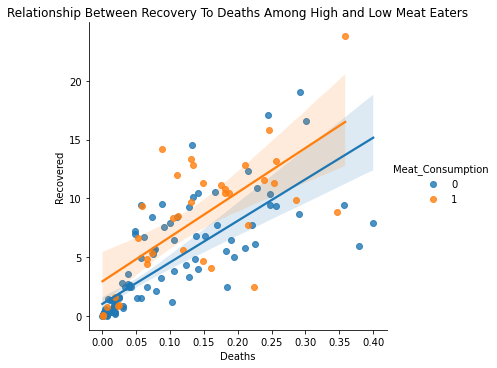

In [26]:
#Checking relationship between meat consumption and Recovery to Death Ratio
sns.lmplot(x="Deaths",y='Recovered', hue='Meat_Consumption', data=df_kcal)
plt.title("Relationship Between Recovery To Deaths Among High and Low Meat Eaters")
plt.show()

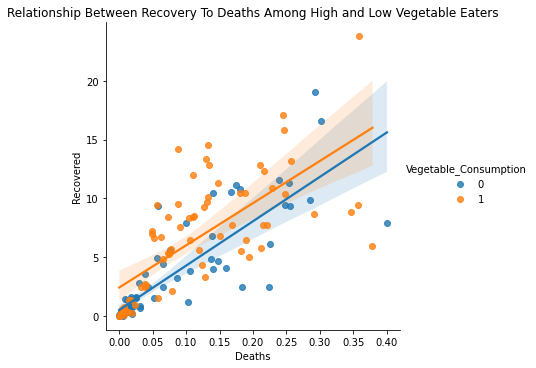

In [27]:
#Checking relationship between vegetable consumption and Recovery to Death Ratio
sns.lmplot(x="Deaths",y='Recovered', hue='Vegetable_Consumption', data=df_kcal)
plt.title("Relationship Between Recovery To Deaths Among High and Low Vegetable Eaters")
plt.show()

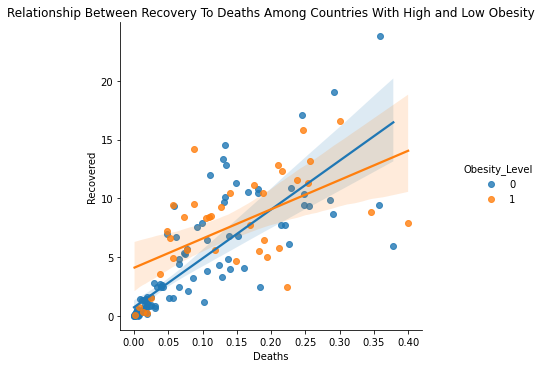

In [28]:
#Checking relationship between obesity and Recovery to Death Ratio
sns.lmplot(x="Deaths",y='Recovered', hue='Obesity_Level', data=df_kcal)
plt.title("Relationship Between Recovery To Deaths Among Countries With High and Low Obesity")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe2e55a6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe2e55ad90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe2e55a370>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe2e566490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe2e5667f0>],
 'means': []}

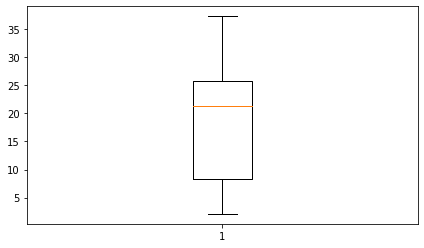

In [29]:
plt.boxplot(df_kcal.Obesity)

#### Creating Required Columns and Preprocessing Steps for ML models

In [109]:
# Prof mentioned that high death rate accompanied by a high recovery rate is expected because more confirmed cases means more deaths and recoveries
#So decided to observe correlation between food group and ratio of recovery to death
sum_column2 = df_kcal['Recovered']/df_kcal['Deaths']
df_kcal['Ratio of Recovery to Death'] = sum_column2

In [110]:
#Checking for issues in data
df_kcal.describe()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population,Ratio of Recovery to Death
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,1.540000e+02,154.000000
mean,1.310975,9.050435,1.265275,0.003076,20.575647,0.421891,0.592167,2.008186,3.684662,2.938984,...,40.950944,4.875444,1.066180,18.449351,5.510239,0.092164,4.968231,0.449843,4.873200e+07,inf
std,1.080327,4.793536,1.316687,0.032440,6.506307,0.310935,0.550383,1.455394,2.116294,2.066412,...,4.793145,2.184836,0.641302,9.519483,5.386185,0.097782,4.961672,0.737322,1.660749e+08,NaN
min,0.000000,1.623700,0.040800,0.000000,8.956500,0.018800,0.000000,0.147100,0.298000,0.116900,...,27.708900,0.932500,0.095700,2.100000,0.000312,0.000000,0.000306,0.000000,7.223500e+04,3.491761
25%,0.361300,4.810425,0.336850,0.000000,15.338125,0.130675,0.231125,1.184600,1.918425,1.069250,...,36.931350,3.075900,0.589400,8.250000,0.465540,0.010222,0.406148,0.006212,3.386338e+06,32.107916
50%,1.194250,8.730650,0.763300,0.000000,20.060950,0.393550,0.442200,1.679950,3.482050,2.675300,...,41.273700,4.638450,0.989000,21.300000,4.204724,0.056853,3.716227,0.088721,1.034807e+07,56.450311
75%,2.027450,13.073450,1.869675,0.000000,24.970375,0.629950,0.834400,2.383025,5.042525,4.376425,...,45.201875,6.519100,1.334775,25.700000,9.427713,0.146331,8.445140,0.498469,3.424861e+07,78.736622
max,5.157400,22.291100,7.800700,0.400700,37.526500,1.446100,4.418300,8.854000,10.567400,9.944100,...,48.386400,10.383900,3.226900,45.500000,24.676325,0.400064,23.787404,3.337548,1.439324e+09,inf


In [112]:
#Ratio of recovery to death has some undefined and some values = 0 for stats, so need to drop rows where recovery or death = 0
df_kcal = df_kcal.drop(df_kcal[(df_kcal.Recovered == 0) | (df_kcal.Deaths == 0) | (df_kcal.Confirmed == 0)].index)
df_kcal.shape

(150, 33)

In [113]:
#Checkimg to confirm that issues have been resolved
df_kcal.describe()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population,Ratio of Recovery to Death
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000
mean,1.331336,9.092725,1.272763,0.002934,20.644697,0.429543,0.573934,1.985351,3.669779,2.998377,...,40.908687,4.943734,1.073469,18.314667,5.657150,0.094622,5.100696,0.461832,4.997500e+07,67.007175
std,1.085828,4.812964,1.329959,0.032774,6.472334,0.311389,0.543156,1.453913,2.107009,2.059498,...,4.812327,2.169599,0.637078,9.306917,5.380827,0.097897,4.959738,0.743416,1.681106e+08,59.821187
min,0.000000,1.623700,0.040800,0.000000,8.956500,0.018800,0.000000,0.147100,0.298000,0.116900,...,27.708900,0.932500,0.095700,2.100000,0.000852,0.000035,0.000306,0.000040,7.223500e+04,3.491761
25%,0.375500,4.895300,0.326550,0.000000,15.338125,0.138300,0.228950,1.184600,1.918425,1.108550,...,36.931350,3.224100,0.601400,8.250000,0.599988,0.012100,0.481769,0.006828,4.001392e+06,31.152323
50%,1.214400,8.798450,0.774200,0.000000,20.244050,0.403750,0.427900,1.667250,3.482050,2.869250,...,41.205900,4.687100,0.995250,21.300000,4.595935,0.057962,4.028947,0.098951,1.086787e+07,55.456803
75%,2.039750,13.073450,1.869675,0.000000,24.970375,0.632800,0.822275,2.370700,5.042525,4.516450,...,45.104700,6.599950,1.334775,25.700000,9.661143,0.148377,8.620012,0.516364,3.524625e+07,76.322902
max,5.157400,22.291100,7.800700,0.400700,37.526500,1.446100,4.418300,8.854000,10.567400,9.944100,...,48.386400,10.383900,3.226900,37.300000,24.676325,0.400064,23.787404,3.337548,1.439324e+09,448.029412


{'whiskers': [<matplotlib.lines.Line2D at 0x1fe3290e6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe3290ed90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe3290e340>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe32918490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe329187f0>],
 'means': []}

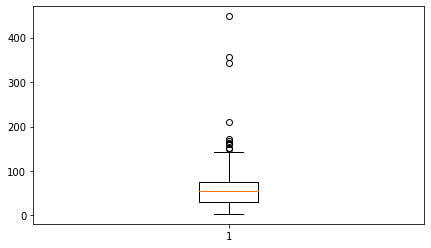

In [117]:
#Checking for Outliers
plt.boxplot(df_kcal['Ratio of Recovery to Death'])

In [118]:
#Dropping outlier rows
df_kcal = df_kcal.drop(df_kcal[df_kcal['Ratio of Recovery to Death'] > 180].index)
#Making sure the difference is not too big
(df_kcal['Ratio of Recovery to Death'].max() - df_kcal['Ratio of Recovery to Death'].min())/3

55.98217017795897

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe32962640>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe32962d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe329622e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe3296d400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe3296d760>],
 'means': []}

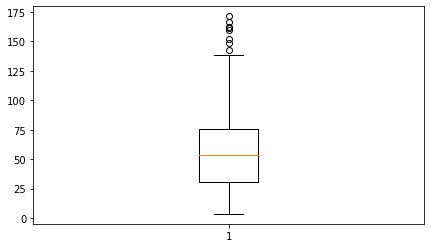

In [119]:
#Rechecking for improvement in outliers
plt.boxplot(df_kcal['Ratio of Recovery to Death'])

#### Creating Required Y Column #1: Levels for Recovery% : Death% Ratio

In [30]:
from sklearn.preprocessing import scale
# determining all independent variables
x = scale(df_kcal.iloc[:, 1:24])
#Dividing "Ratio of Recovery to Death" values into 3 levels based on quantiles
#to determine 3 categories, instead of doing equal ranges, do it by distribution with quantile = 0.33: df.field_A.quantile(0.33), to get = number of observations in each group
q1 = df_kcal['Ratio of Recovery to Death'].quantile(1/3)
q2 = df_kcal['Ratio of Recovery to Death'].quantile(2/3)

maximum = df_kcal['Ratio of Recovery to Death'].max()
#Splits into 3 respective groups and assigns them to 0, 1, 2 and puts them in a new variable called y
criteria = [df_kcal['Ratio of Recovery to Death'].between(0, q1), df_kcal['Ratio of Recovery to Death'].between(q1, q2), df_kcal['Ratio of Recovery to Death'].between(q2, maximum + 1)]
values = [0, 1, 2]
df_kcal['y'] = np.select(criteria, values, 0)
df_kcal

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Recovered,Active,Population,Unit (all except Population),Number Confirmed Cases,Ratio of Recovery to Death,Meat_Consumption,Obesity_Level,Vegetable_Consumption,y
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,0.349546,0.023375,40145225.0,%,157015.0,19.209582,0,0,0,0
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,6.458112,0.278170,2873425.0,%,196611.0,60.862250,0,0,1,1
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,0.319045,0.132750,44950745.0,%,209111.0,23.799038,0,1,1,0
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,0.184119,0.000525,34283759.0,%,65033.0,36.487283,0,0,0,0
5,Argentina,1.4354,14.9869,1.0650,0.0,16.7927,0.8643,0.2006,1.4663,9.4459,...,11.323043,0.036673,45772333.0,%,5315989.0,44.532840,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela,0.8454,7.2303,0.6007,0.0,21.3126,0.2892,0.4449,2.3804,3.1368,...,1.456159,0.029961,28323827.0,%,426014.0,81.061321,0,0,0,2
166,Vietnam,0.7150,10.9806,0.9363,0.0,26.9833,0.2894,1.0385,1.8046,7.8311,...,0.923611,0.173107,98556168.0,%,1104835.0,38.005762,1,0,1,1
167,Yemen,0.0000,3.4667,0.3394,0.0,32.0727,0.1455,0.1697,1.1879,2.0121,...,0.022061,0.004047,30737797.0,%,9967.0,3.491761,0,0,0,0
168,Zambia,1.1925,3.3043,0.3230,0.0,31.5528,0.1988,0.5714,0.2236,1.5155,...,1.080297,0.000471,19098078.0,%,210073.0,56.262885,0,0,0,1


In [31]:
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
#Code to create a Kmeans cluster model with 3 clusters
clustering = KMeans(n_clusters = 3, random_state = 5)

In [33]:
#Fits independent variable (inputs) to model
clustering.fit(x)

KMeans(n_clusters=3, random_state=5)

In [34]:
#Setting color theme for clusters
color_theme = color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

#### Creating Required Y Column #2: Levels for Confirmed% 

In [35]:
#Dividing "Confirmed"% values into 3 levels based on quantiles
g1 = df_kcal['Confirmed'].quantile(1/3)
g2 = df_kcal['Confirmed'].quantile(2/3)
maximum = df_kcal['Confirmed'].max()
#Splits into 3 respective groups and assigns them to 0, 1, 2 and puts them in a new variable called y
criteria = [df_kcal['Confirmed'].between(0, g1), df_kcal['Confirmed'].between(g1, g2), df_kcal['Confirmed'].between(g2, maximum + 1)]
values = [0, 1, 2]
df_kcal['y_2'] = np.select(criteria, values, 0)
df_kcal

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Active,Population,Unit (all except Population),Number Confirmed Cases,Ratio of Recovery to Death,Meat_Consumption,Obesity_Level,Vegetable_Consumption,y,y_2
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,0.023375,40145225.0,%,157015.0,19.209582,0,0,0,0,0
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,0.278170,2873425.0,%,196611.0,60.862250,0,0,1,1,1
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,0.132750,44950745.0,%,209111.0,23.799038,0,1,1,0,0
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,0.000525,34283759.0,%,65033.0,36.487283,0,0,0,0,0
5,Argentina,1.4354,14.9869,1.0650,0.0,16.7927,0.8643,0.2006,1.4663,9.4459,...,0.036673,45772333.0,%,5315989.0,44.532840,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela,0.8454,7.2303,0.6007,0.0,21.3126,0.2892,0.4449,2.3804,3.1368,...,0.029961,28323827.0,%,426014.0,81.061321,0,0,0,2,1
166,Vietnam,0.7150,10.9806,0.9363,0.0,26.9833,0.2894,1.0385,1.8046,7.8311,...,0.173107,98556168.0,%,1104835.0,38.005762,1,0,1,1,0
167,Yemen,0.0000,3.4667,0.3394,0.0,32.0727,0.1455,0.1697,1.1879,2.0121,...,0.004047,30737797.0,%,9967.0,3.491761,0,0,0,0,0
168,Zambia,1.1925,3.3043,0.3230,0.0,31.5528,0.1988,0.5714,0.2236,1.5155,...,0.000471,19098078.0,%,210073.0,56.262885,0,0,0,1,0


#### K means Clustering for Checking Match with Confirmed% Levels

Text(0.5, 1.0, 'K-Means Classification')

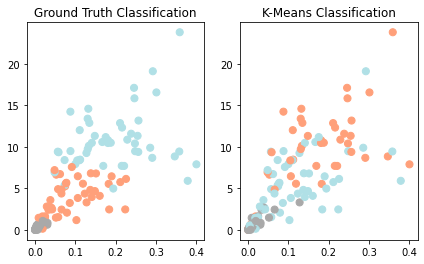

In [41]:
#Clustering subplot
plt.subplot(1,2,1)
plt.scatter(x=df_kcal['Deaths'],y=df_kcal['Recovered'],c=color_theme[df_kcal.y_2], s=50)
plt.title('Ground Truth Classification')
# Clustered scatter plot with color scheme based on K-means cluster predicted species 
plt.subplot(1,2,2)
plt.scatter(x=df_kcal['Deaths'],y=df_kcal['Recovered'],c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

Text(0, 0.5, 'Recovered%')

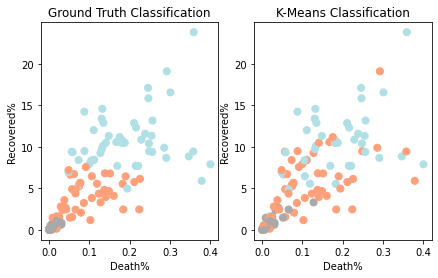

In [44]:
#Kmeans made accurate prediction however miscolored the clusters
#Will fix by making 0(gray) -> 0, 1(orange) -> 2, and 2(blue) -> 1
relabel = np.choose(clustering.labels_,[0,2,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=df_kcal['Deaths'],y=df_kcal['Recovered'],c=color_theme[df_kcal.y_2], s=50)
plt.xlabel('Death%')
plt.ylabel('Recovered%')
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=df_kcal['Deaths'],y=df_kcal['Recovered'],c=color_theme[relabel], s=50)
plt.title('K-Means Classification')
plt.xlabel('Death%')
plt.ylabel('Recovered%')

In [50]:
#Classification Report
y_actual = pd.DataFrame(df_kcal['y_2'])
print(classification_report(y_actual, relabel))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77        49
           1       0.57      0.69      0.62        48
           2       0.75      0.67      0.71        49

    accuracy                           0.70       146
   macro avg       0.71      0.70      0.70       146
weighted avg       0.71      0.70      0.70       146



#### K means Clustering for Checking Match with Recovery%:Death% Levels

Text(0.5, 1.0, 'K-Means Classification')

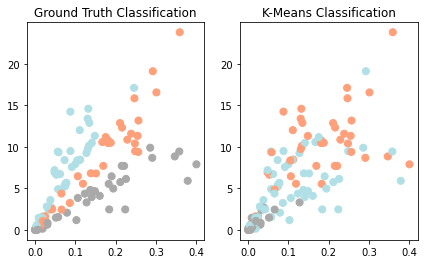

In [46]:
#Clustering subplot
plt.subplot(1,2,1)
plt.scatter(x=df_kcal['Deaths'],y=df_kcal['Recovered'],c=color_theme[df_kcal.y], s=50)
plt.title('Ground Truth Classification')
# Clustered scatter plot with color scheme based on K-means cluster predicted species 
plt.subplot(1,2,2)
plt.scatter(x=df_kcal['Deaths'],y=df_kcal['Recovered'],c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

Text(0, 0.5, 'Recovered%')

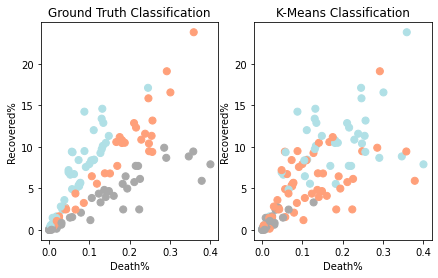

In [48]:
#Kmeans made accurate prediction however miscolored the clusters
#Will fix by making 0(gray) -> 0, 1(orange) -> 2, and 2(blue) -> 1
relabel = np.choose(clustering.labels_,[0,2,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=df_kcal['Deaths'],y=df_kcal['Recovered'],c=color_theme[df_kcal.y], s=50)
plt.xlabel('Death%')
plt.ylabel('Recovered%')
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=df_kcal['Deaths'],y=df_kcal['Recovered'],c=color_theme[relabel], s=50)
plt.title('K-Means Classification')
plt.xlabel('Death%')
plt.ylabel('Recovered%')

In [51]:
#Classification Report
y_actual = pd.DataFrame(df_kcal['y'])
print(classification_report(y_actual, relabel))

              precision    recall  f1-score   support

           0       0.43      0.39      0.41        49
           1       0.28      0.33      0.30        48
           2       0.43      0.39      0.41        49

    accuracy                           0.37       146
   macro avg       0.38      0.37      0.37       146
weighted avg       0.38      0.37      0.37       146



In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from itertools import repeat
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#### Random Forest Classifier for Confirmed% Levels

In [54]:
#Calculating Average Accuracy
predictions = 0
avg_score = 0.0
ntimes = 30
clf = 0
X = df_kcal.iloc[:, 1:24]
y = df_kcal.y_2
for i in repeat(None, ntimes):

    # train model with 80% of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

    # prediction
    # Creating a random forest classifier
    clf = RandomForestClassifier(n_jobs = 2, random_state = 0, n_estimators = 40)
    # Training Classifier
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    # compute model accuracy
    avg_score += accuracy_score(y_test, predictions)

avg_score/= ntimes
print(avg_score)
#Confusion Matrix (for most recent model)
array = pd.crosstab(y_test, predictions, rownames = ['Actual result'], colnames = ['Predicted Result'])
array

0.7136363636363635


Predicted Result,0,1,2
Actual result,,,
0,2,1,1
1,2,5,1
2,0,5,5


<AxesSubplot:xlabel='Predicted Result', ylabel='Actual result'>

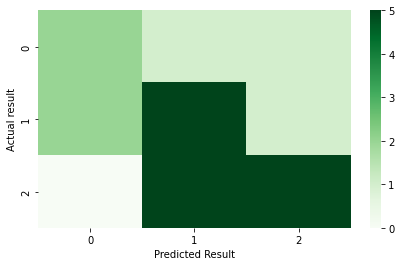

In [55]:
#Colored Confusion Matrix
sns.heatmap(array,cmap="Greens" )

#### Random Forest Classifier for Recovery% : Death% Levels

In [60]:
#Calculating Average Accuracy
predictions = 0
avg_score = 0.0
ntimes = 30
clf = 0
X = df_kcal.iloc[:, 1:24]
y = df_kcal.y
for i in repeat(None, ntimes):

    # train model with 80% of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

    # prediction
    # Creating a random forest classifier
    clf = RandomForestClassifier(n_jobs = 2, random_state = 0, n_estimators = 40)
    # Training Classifier
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    # compute model accuracy
    avg_score += accuracy_score(y_test, predictions)

avg_score/= ntimes
print(avg_score)
#Confusion Matrix (for most recent model)
array = pd.crosstab(y_test, predictions, rownames = ['Actual result'], colnames = ['Predicted Result'])
array

0.3075757575757575


Predicted Result,0,1,2
Actual result,,,
0,3,5,1
1,1,0,5
2,3,2,2


<AxesSubplot:xlabel='Predicted Result', ylabel='Actual result'>

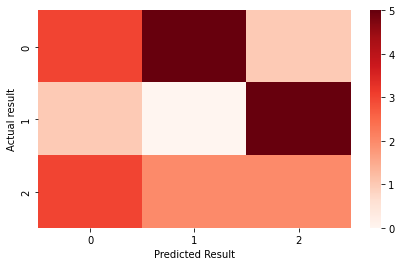

In [61]:
#Colored Confusion Matrix
sns.heatmap(array, cmap = "Reds")

#### Testing influence of animal product consumption on Infection (Confirmed%) rates

In [72]:
#Calculating Average Accuracy
predictions = 0
avg_score = 0.0
ntimes = 30
clf = 0
X = df_kcal[['Animal Products', 'Animal fats', 'Meat']]
y = df_kcal.y_2
for i in repeat(None, ntimes):

    # train model with 80% of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # prediction
    # Creating a random forest classifier
    clf = RandomForestClassifier(n_jobs = 2, random_state = 0, n_estimators = 40)
    # Training Classifier
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    # compute model accuracy
    avg_score += accuracy_score(y_test, predictions)

avg_score/= ntimes
print(avg_score)
#Confusion Matrix (for most recent model)
array = pd.crosstab(y_test, predictions, rownames = ['Actual result'], colnames = ['Predicted Result'])
array

0.6155555555555555


Predicted Result,0,1,2
Actual result,,,
0,3,4,1
1,5,7,1
2,0,6,3


#### Testing influence of  plant-based consumption on Infection (Confirmed%) rates

In [73]:
#Calculating Average Accuracy
predictions = 0
avg_score = 0.0
ntimes = 30
clf = 0
X = df_kcal[['Fruits - Excluding Wine', 'Pulses', 'Spices', 'Vegetables', 'Treenuts', 'Vegetal Products', 'Starchy Roots']]
y = df_kcal.y_2
for i in repeat(None, ntimes):

    # train model with 80% of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

    # prediction
    # Creating a random forest classifier
    clf = RandomForestClassifier(n_jobs = 2, random_state = 0, n_estimators = 40)
    # Training Classifier
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    # compute model accuracy
    avg_score += accuracy_score(y_test, predictions)

avg_score/= ntimes
print(avg_score)
#Confusion Matrix (for most recent model)
array = pd.crosstab(y_test, predictions, rownames = ['Actual result'], colnames = ['Predicted Result'])
array

0.643939393939394


Predicted Result,0,1,2
Actual result,,,
0,5,0,2
1,2,4,0
2,0,2,7


#### Testing influence of obesity and malnourishment rates on Infection (Confirmed%) rates

In [79]:
df_kcal['Undernourished'].unique()

array(['29.8', '6.2', '3.9', '25', '4.6', '4.3', '<2.5', '14.7', '7.5',
       '10.1', '17.1', '26.4', '3.6', '20', '12.6', '16.4', '9.9', '59.6',
       '37.5', '8.5', '4.8', '40.3', '19', '18.9', '9.5', '7.9', '4.5',
       '9', '2.9', '20.6', '3.7', '10.5', '10.2', '5.5', '15.2', '16.5',
       '28', '8.1', '49.3', '12.9', '14.5', '8.3', '4.9', '29', '8',
       '12.2', '29.4', '2.8', '7.1', '11', '13.1', '37.2', '44.4', '17.5',
       '2.5', '6.3', '10.4', '6.5', '13.4', '3.4', '27.9', '27.3', '8.7',
       '17', '3.2', '6.8', '20.3', '10', '10.7', '9.7', '13.3', '36.8',
       '5.7', '7', '11.3', '25.6', '20.1', '7.8', '24.9', '16.1', '41',
       '3.5', '30.7', '21.2', '9.3', '38.9', '46.7', '51.3'], dtype=object)

In [80]:
df_kcal["Undernourished"].replace({"<2.5": "2.5"}, inplace=True)

In [83]:
#Calculating average accuracy
predictions = 0
avg_score = 0.0
ntimes = 30
clf = 0
X = df_kcal[['Obesity', 'Undernourished']]
y = df_kcal.y_2
for i in repeat(None, ntimes):

    # train model with 80% of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # prediction
    # Creating a random forest classifier
    clf = RandomForestClassifier(n_jobs = 2, random_state = 0, n_estimators = 40)
    # Training Classifier
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    # compute model accuracy
    avg_score += accuracy_score(y_test, predictions)

avg_score/= ntimes
print(avg_score)
#Confusion Matrix (for most recent model)
array = pd.crosstab(y_test, predictions, rownames = ['Actual result'], colnames = ['Predicted Result'])
array

0.6088888888888888


Predicted Result,0,1,2
Actual result,,,
0,4,3,1
1,1,8,5
2,1,3,4


#### Using Regression To Directly Predict Confirmed% and Recovery% : Death% ratio

In [84]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
df_kcal = df_kcal.replace('<2.5', '2.5')
df_kcal['Undernourished'] = df_kcal['Undernourished'].astype(float)

In [85]:
#Checking type of Undernourished Column
type(df_kcal['Undernourished'][0])

numpy.float64

In [86]:
#Splitting into 80% training 20% testing
df_train, df_test = train_test_split(df_kcal, test_size = 0.2)

In [95]:
#Generating Linear Model for predicting Confirmed% with all independent variables
model_Confirmed = smf.ols('Q("Confirmed")~Q("Alcoholic Beverages")+Q("Animal Products")+Q("Animal fats")+Q("Aquatic Products, Other")+Q("Cereals - Excluding Beer")+Q("Eggs")+Q("Fish, Seafood")+Q("Fruits - Excluding Wine")+Q("Meat")+Q("Milk - Excluding Butter")+Q("Miscellaneous")+Q("Offals")+Q("Oilcrops")+Q("Pulses")+Q("Spices")+Q("Starchy Roots")+Q("Stimulants")+Q("Sugar Crops")+Q("Sugar & Sweeteners")+Q("Treenuts")+Q("Vegetal Products")+Q("Vegetable Oils")+Q("Vegetables")+Q("Obesity")+Q("Undernourished")', data = df_train).fit()
model_Confirmed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Q("Confirmed")   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     6.699
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           7.71e-12
Time:                        20:10:17   Log-Likelihood:                -297.70
No. Observations:                 116   AIC:                             647.4
Df Residuals:                      90   BIC:                             719.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      4.309e+04   2.98e+05      0.145      0.885   -5.49e+05    6.35e+05
Q("Alcoholic Beverages")       -422.2866   2983.563     -0.142      0.888   -6349.656    5505.083
Q("Animal Products")           -414.8912   2980.044     -0.139      0.890   -6335.268    5505.486
Q("Animal fats")               -446.6705   2979.002     -0.150      0.881   -6364.977    5471.636
Q("Aquatic Products, Other")   -445.9817   2979.145     -0.150      0.881   -6364.573    5472.609
Q("Cereals - Excluding Beer")  -422.7542   2983.613     -0.142      0.888   -6350.222    5504.714
Q("Eggs")                      -446.1560   2978.872     -0.150      0.881   -6364.205    5471.893
Q("Fish, Seafood")             -448.8057   2979.056     -0.151      0.881   -6367.221    5469.610
Q("Fruits - Excluding Wine")   -422.7405   2983.583     -0.142      0.888   -6350.150    5504.669
Q("Meat")                      -446.9466   2978.976     -0.150      0.881   -6365.202    5471.308
Q("Milk - Excluding Butter")   -446.3484   2978.989     -0.150      0.881   -6364.630    5471.933
Q("Miscellaneous")             -425.0909   2983.494     -0.142      0.887   -6352.323    5502.142
Q("Offals")                    -450.2668   2978.435     -0.151      0.880   -6367.447    5466.914
Q("Oilcrops")                  -422.4476   2983.654     -0.142      0.888   -6349.996    5505.101
Q("Pulses")                    -422.8110   2983.645     -0.142      0.888   -6350.343    5504.720
Q("Spices")                    -423.1448   2983.768     -0.142      0.888   -6350.921    5504.632
Q("Starchy Roots")             -422.6779   2983.602     -0.142      0.888   -6350.124    5504.768
Q("Stimulants")                -416.8805   2983.732     -0.140      0.889   -6344.585    5510.824
Q("Sugar Crops")               -420.2630   2983.944     -0.141      0.888   -6348.388    5507.862
Q("Sugar & Sweeteners")        -422.5009   2983.606     -0.142      0.888   -6349.956    5504.954
Q("Treenuts")                  -422.2286   2983.692     -0.142      0.888   -6349.854    5505.396
Q("Vegetal Products")          -439.1038   2975.313     -0.148      0.883   -6350.082    5471.874
Q("Vegetable Oils")            -422.7243   2983.639     -0.142      0.888   -6350.244    5504.795
Q("Vegetables")                -423.8060   2983.623     -0.142      0.887   -6351.294    5503.682
Q("Obesity")                      0.0999      0.074      1.356      0.179      -0.046       0.246
Q("Undernourished")              -0.0598      0.049     -1.230      0.222      -0.156       0.037
==============================================================================
Omnibus:                        5.282   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                6.865
Skew

In [94]:
#Generating Linear Model for predicting Confirmed% with all independent variables
model_RecoveryDeath = smf.ols('Q("Ratio of Recovery to Death")~Q("Alcoholic Beverages")+Q("Animal Products")+Q("Animal fats")+Q("Aquatic Products, Other")+Q("Cereals - Excluding Beer")+Q("Eggs")+Q("Fish, Seafood")+Q("Fruits - Excluding Wine")+Q("Meat")+Q("Milk - Excluding Butter")+Q("Miscellaneous")+Q("Offals")+Q("Oilcrops")+Q("Pulses")+Q("Spices")+Q("Starchy Roots")+Q("Stimulants")+Q("Sugar Crops")+Q("Sugar & Sweeteners")+Q("Treenuts")+Q("Vegetal Products")+Q("Vegetable Oils")+Q("Vegetables")+Q("Obesity")+Q("Undernourished")', data = df_train).fit()
model_RecoveryDeath.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Q("Ratio of Recovery to Death")   R-squared:                       0.181
Model:                                         OLS   Adj. R-squared:                 -0.047
Method:                              Least Squares   F-statistic:                    0.7932
Date:                             Wed, 12 Jan 2022   Prob (F-statistic):              0.740
Time:                                     20:10:12   Log-Likelihood:                -566.37
No. Observations:                              116   AIC:                             1185.
Df Residuals:                                   90   BIC:                             1256.
Df Model:                                       25                                         
Covariance Type:                         nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      4.584e+06   3.02e+06      1.518      0.133   -1.42e+06    1.06e+07
Q("Alcoholic Beverages")      -4.611e+04   3.02e+04     -1.525      0.131   -1.06e+05     1.4e+04
Q("Animal Products")          -4.591e+04   3.02e+04     -1.520      0.132   -1.06e+05    1.41e+04
Q("Animal fats")              -4.576e+04   3.02e+04     -1.515      0.133   -1.06e+05    1.42e+04
Q("Aquatic Products, Other")  -4.577e+04   3.02e+04     -1.516      0.133   -1.06e+05    1.42e+04
Q("Cereals - Excluding Beer")  -4.61e+04   3.02e+04     -1.524      0.131   -1.06e+05     1.4e+04
Q("Eggs")                     -4.575e+04   3.02e+04     -1.515      0.133   -1.06e+05    1.42e+04
Q("Fish, Seafood")            -4.576e+04   3.02e+04     -1.515      0.133   -1.06e+05    1.42e+04
Q("Fruits - Excluding Wine")   -4.61e+04   3.02e+04     -1.524      0.131   -1.06e+05     1.4e+04
Q("Meat")                     -4.576e+04   3.02e+04     -1.515      0.133   -1.06e+05    1.42e+04
Q("Milk - Excluding Butter")  -4.576e+04   3.02e+04     -1.515      0.133   -1.06e+05    1.42e+04
Q("Miscellaneous")            -4.611e+04   3.02e+04     -1.525      0.131   -1.06e+05     1.4e+04
Q("Offals")                   -4.575e+04   3.02e+04     -1.515      0.133   -1.06e+05    1.42e+04
Q("Oilcrops")                  -4.61e+04   3.02e+04     -1.524      0.131   -1.06e+05     1.4e+04
Q("Pulses")                    -4.61e+04   3.02e+04     -1.524      0.131   -1.06e+05     1.4e+04
Q("Spices")                   -4.609e+04   3.02e+04     -1.524      0.131   -1.06e+05     1.4e+04
Q("Starchy Roots")             -4.61e+04   3.02e+04     -1.524      0.131   -1.06e+05     1.4e+04
Q("Stimulants")               -4.608e+04   3.02e+04     -1.524      0.131   -1.06e+05     1.4e+04
Q("Sugar Crops")              -4.616e+04   3.02e+04     -1.526      0.131   -1.06e+05    1.39e+04
Q("Sugar & Sweeteners")       -4.611e+04   3.02e+04     -1.524      0.131   -1.06e+05     1.4e+04
Q("Treenuts")                  -4.61e+04   3.02e+04     -1.524      0.131   -1.06e+05     1.4e+04
Q("Vegetal Products")         -4.557e+04   3.02e+04     -1.511      0.134   -1.05e+05    1.43e+04
Q("Vegetable Oils")            -4.61e+04   3.02e+04     -1.524      0.131   -1.06e+05     1.4e+04
Q("Vegetables")               -4.611e+04   3.02e+04     -1.524      0.131   -1.06e+05     1.4e+04
Q("Obesity")                      0.3474      0.747      0.465      0.643      -1.136       1.831
Q("Undernourished")              -0.4243      0.493     -0.861      0.392      -1.404       0.555
==============================================================================
Omnibus:           

#### Determining 12 most important variables for predicting Confirmed% Levels

In [90]:
from sklearn.linear_model import Lasso, LinearRegression
inp = df_kcal.iloc[:, 1:24]
out = df_kcal.Confirmed
rfe = RFE(estimator=LinearRegression(), n_features_to_select=12)
model = LinearRegression()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(inp, out)
print(rfe.support_)
string = 'Columns = '
for i,j in zip(rfe.support_, inp.columns):
    if i:
        string = string + j + "| "
print(string)

[False False  True  True False  True  True False  True  True  True  True
 False  True False False False  True False False  True False  True]
Columns = Animal fats| Aquatic Products, Other| Eggs| Fish, Seafood| Meat| Milk - Excluding Butter| Miscellaneous| Offals| Pulses| Sugar Crops| Vegetal Products| Vegetables| 


In [91]:
#Generating Linear Model for predicting Confirmed% with selected independent variables above
model2_ols = smf.ols('Confirmed~Q("Animal fats")+Q("Aquatic Products, Other")+Q("Eggs")+Q("Fish, Seafood")+Q("Meat")+Q("Milk - Excluding Butter")+Q("Miscellaneous")+Q("Offals")+Q("Pulses")+Q("Sugar Crops")+Q("Vegetal Products")+Q("Vegetables")', data = df_kcal).fit()
model2_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     15.25
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           9.48e-20
Time:                        20:05:16   Log-Likelihood:                -388.66
No. Observations:                 146   AIC:                             803.3
Df Residuals:                     133   BIC:                             842.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1919.4966   1437.494      1.335      0.184    -923.811    4762.805
Q("Animal fats")               -37.6694     28.750     -1.310      0.192     -94.535      19.196
Q("Aquatic Products, Other")   -47.6185     30.238     -1.575      0.118    -107.428      12.191
Q("Eggs")                      -35.9257     28.962     -1.240      0.217     -93.211      21.360
Q("Fish, Seafood")             -39.3899     28.673     -1.374      0.172     -96.103      17.323
Q("Meat")                      -37.7113     28.757     -1.311      0.192     -94.591      19.168
Q("Milk - Excluding Butter")   -37.4373     28.719     -1.304      0.195     -94.242      19.367
Q("Miscellaneous")              -0.5242      2.034     -0.258      0.797      -4.547       3.498
Q("Offals")                    -48.3947     28.953     -1.672      0.097    -105.662       8.873
Q("Pulses")                     -0.4082      0.299     -1.365      0.174      -1.000       0.183
Q("Sugar Crops")                -6.0894      4.651     -1.309      0.193     -15.288       3.109
Q("Vegetal Products")          -38.3625     28.753     -1.334      0.184     -95.234      18.509
Q("Vegetables")                 -0.1973      0.554     -0.356      0.722      -1.293       0.899
==============================================================================
Omnibus:                       11.665   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               23.521
Skew:                           0.286   Prob(JB):                     7.81e-06
Kurtosis:                       4.881   Cond. No.                     1.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""